# DATA MINING

In [144]:
from lxml import html
import requests
import re
import csv

### Chosen Activities
'jumping', 'climbingdown', 'sitting', 'running'
### Chosen Sensors 
Magnetic Field, Sound Level, Accelometer
### Body part 
Upperarm

## Pattern for links (make changes!!!)
####Magnetic Field
//*[@id="c304518"]/div/div[2]/table/tbody/tr[5]/td[2]/a[1]

####Sound Level
//*[@id="c304518"]/div/div[2]/table/tbody/tr[6]/td[2]/a[1]

####Accelometer
//*[@id="c304518"]/div/div[2]/table/tbody/tr[1]/td[2]/a[1]

In [145]:
#!Copying all csv data from hyperlink.

hyperlink = 'https://www.uni-mannheim.de/dws/research/projects/activity-recognition/dataset/dataset-realworld/s13/'

folio = requests.get(hyperlink)
content = folio.content

node = html.fromstring(content)
links = node.xpath('//table/tbody/tr/td/a')

csv_array=[]
for i in range(len(links)):
    #Return all csv files
    if links[i].text == 'csv':
        csv_array.append(f"https://www.uni-mannheim.de{links[i].attrib['href']}")
        print(links[i].attrib['href'])

/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/acc_walking_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/gps_walking_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/gyr_walking_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/lig_walking_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/mag_walking_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/mic_walking_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/acc_sitting_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/gps_sitting_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/gyr_sitting_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/sensor/realworld/s13/data/lig_sitting_csv.zip
/media/Einrichtungen/dws/Files_Research/Projects/s

### Saving all csv files according to activity name

In [148]:
import requests
import zipfile
import io

for link in csv_array:
    folder_name = link.split('/')[-1].split('.')[0]
    z = zipfile.ZipFile(io.BytesIO(requests.get(link).content))
    z.extractall(f"/Users/lucillenawa/CI_2023/Assignment/Subject 13/{folder_name}")

In [10]:
#Choosing activities
activity_data = ['jumping', 'climbingdown', 'sitting', 'running']
sensor_data = ['mag', 'mic', 'acc']
body_part= 'upperarm'

### Join sensors for each activity

In [11]:
import pandas as pd
import os

path = '/Users/lucillenawa/CI_2023/Assignment/Subject 13'

tree_data = {}
for (dirpath, dirnames, filenames) in os.walk(path):
    for filename in filenames:
        file=os.path.join(dirpath, filename)
        for b in activity_data:
            for i in sensor_data:
                if i in file:
                    if '.csv' in file and body_part in file:
                        activity = file.split('_')[-2]
                        if activity == b:
                            dataFrame_temp=pd.read_csv(file)
                            dataFrame_temp.columns = [f'{i}_{str(col)}' for col in dataFrame_temp.columns]
                    
                            if activity in tree_data:
                               tree_data[activity][i]=dataFrame_temp
                            else:
                                tree_data[activity] = { i : dataFrame_temp }

In [12]:
tree_data['sitting']['mic']

,mic_id,mic_attr_time,mic_attr_db
0,1,1436980333679,54.287211
1,2,1436980334422,65.133361
2,3,1436980335136,52.292674
3,4,1436980335854,54.072287
4,5,1436980336599,37.519159
...,...,...,...
880,881,1436980977242,56.644706
881,882,1436980977977,51.223723
882,883,1436980978705,39.258761
883,884,1436980979406,62.901038


### Merge all sensors for each activity

In [101]:
processed_treedata=[]
for activity in tree_data:
    temp_dataFrame = pd.concat([tree_data[activity]['mag'], tree_data[activity]['mic'], tree_data[activity]['acc']], axis=1)
    temp_dataFrame['activity']=activity
    
    processed_treedata.append(temp_dataFrame)
    

In [102]:
main_dataFrame=pd.DataFrame()
main_dataFrame =pd.concat(processed_treedata)

In [103]:
main_dataFrame

,mag_id,mag_attr_time,mag_attr_x,mag_attr_y,mag_attr_z,mic_id,mic_attr_time,mic_attr_db,acc_id,acc_attr_time,acc_attr_x,acc_attr_y,acc_attr_z,activity
0,1.0,1.436985e+12,-13.832,-42.749,4.823,1.0,1.436985e+12,12.106762,1,1436984545001,-0.391452,10.129868,-1.077989,jumping
1,2.0,1.436985e+12,-13.832,-42.749,4.823,2.0,1.436985e+12,46.719900,2,1436984545009,-0.385466,10.115502,-1.063026,jumping
2,3.0,1.436985e+12,-13.491,-42.749,4.823,3.0,1.436985e+12,31.220922,3,1436984545028,-0.332794,10.111911,-1.089362,jumping
3,4.0,1.436985e+12,-13.491,-42.749,4.823,4.0,1.436985e+12,51.285756,4,1436984545047,-0.293888,10.123882,-1.109713,jumping
4,5.0,1.436985e+12,-13.491,-42.749,4.823,5.0,1.436985e+12,59.584458,5,1436984545074,-0.226252,10.143634,-1.091157,jumping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32319,32320.0,1.436981e+12,2.149,-41.619,-13.993,NaN,NaN,NaN,32320,1436980980517,0.647033,10.278907,-0.828992,sitting
32320,32321.0,1.436981e+12,2.149,-41.619,-13.993,NaN,NaN,NaN,32321,1436980980538,0.872088,10.303447,-1.115698,sitting
32321,32322.0,1.436981e+12,1.824,-41.619,-13.571,NaN,NaN,NaN,32322,1436980980557,0.879271,10.566810,-0.745195,sitting
32322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32323,1436980980577,0.538097,10.674548,-0.715866,sitting


### Removing columns that are not needed (Id and time columns)

In [104]:
main_dataFrame = main_dataFrame.drop(main_dataFrame.columns[[0, 1, 5,6, 8, 9]],axis = 1)

In [105]:
main_dataFrame

,mag_attr_x,mag_attr_y,mag_attr_z,mic_attr_db,acc_attr_x,acc_attr_y,acc_attr_z,activity
0,-13.832,-42.749,4.823,12.106762,-0.391452,10.129868,-1.077989,jumping
1,-13.832,-42.749,4.823,46.719900,-0.385466,10.115502,-1.063026,jumping
2,-13.491,-42.749,4.823,31.220922,-0.332794,10.111911,-1.089362,jumping
3,-13.491,-42.749,4.823,51.285756,-0.293888,10.123882,-1.109713,jumping
4,-13.491,-42.749,4.823,59.584458,-0.226252,10.143634,-1.091157,jumping
...,...,...,...,...,...,...,...,...
32319,2.149,-41.619,-13.993,NaN,0.647033,10.278907,-0.828992,sitting
32320,2.149,-41.619,-13.993,NaN,0.872088,10.303447,-1.115698,sitting
32321,1.824,-41.619,-13.571,NaN,0.879271,10.566810,-0.745195,sitting
32322,NaN,NaN,NaN,NaN,0.538097,10.674548,-0.715866,sitting


### Removing all empty/null columns

In [106]:
main_dataFrame = main_dataFrame.dropna()
main_dataFrame

,mag_attr_x,mag_attr_y,mag_attr_z,mic_attr_db,acc_attr_x,acc_attr_y,acc_attr_z,activity
0,-13.832,-42.749,4.823,12.106762,-0.391452,10.129868,-1.077989,jumping
1,-13.832,-42.749,4.823,46.719900,-0.385466,10.115502,-1.063026,jumping
2,-13.491,-42.749,4.823,31.220922,-0.332794,10.111911,-1.089362,jumping
3,-13.491,-42.749,4.823,51.285756,-0.293888,10.123882,-1.109713,jumping
4,-13.491,-42.749,4.823,59.584458,-0.226252,10.143634,-1.091157,jumping
...,...,...,...,...,...,...,...,...
880,3.997,-43.530,-13.874,56.644706,-0.163404,10.137050,-0.619500,sitting
881,3.997,-43.530,-13.874,51.223723,-0.214880,10.591350,-0.848146,sitting
882,3.997,-43.530,-13.874,39.258761,-0.478242,10.865486,-0.972046,sitting
883,3.997,-43.530,-14.218,62.901038,-0.730232,10.700286,-0.673369,sitting


### Saving Clean Data to 1 file

In [107]:
path = '/Users/lucillenawa/CI_2023/Assignment/Clean Data Upperarm Mag Mic Acc/cleanData.csv'
cleanData = main_dataFrame.to_csv(path)

# DATA PREPROCESSING

In [108]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as nmp

In [109]:
#pip install seaborn

In [110]:
#pip install tensorflow

In [111]:
#pip install numpy

### Importing the dataset

In [112]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.__version__

'2.11.0'

In [113]:
path = '/Users/lucillenawa/CI_2023/Assignment/Clean Data Upperarm Mag Mic Acc/cleanData.csv'
main_dataFrame = pd.read_csv(path)

In [114]:
main_dataFrame

,Unnamed: 0,mag_attr_x,mag_attr_y,mag_attr_z,mic_attr_db,acc_attr_x,acc_attr_y,acc_attr_z,activity
0,0,-13.832,-42.749,4.823,12.106762,-0.391452,10.129868,-1.077989,jumping
1,1,-13.832,-42.749,4.823,46.719900,-0.385466,10.115502,-1.063026,jumping
2,2,-13.491,-42.749,4.823,31.220922,-0.332794,10.111911,-1.089362,jumping
3,3,-13.491,-42.749,4.823,51.285756,-0.293888,10.123882,-1.109713,jumping
4,4,-13.491,-42.749,4.823,59.584458,-0.226252,10.143634,-1.091157,jumping
...,...,...,...,...,...,...,...,...,...
2473,880,3.997,-43.530,-13.874,56.644706,-0.163404,10.137050,-0.619500,sitting
2474,881,3.997,-43.530,-13.874,51.223723,-0.214880,10.591350,-0.848146,sitting
2475,882,3.997,-43.530,-13.874,39.258761,-0.478242,10.865486,-0.972046,sitting
2476,883,3.997,-43.530,-14.218,62.901038,-0.730232,10.700286,-0.673369,sitting


### Encoding Activity Column

In [115]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()

Activity_array = encoding.fit_transform(main_dataFrame['activity'])

In [116]:
Activity_array

array([1, 1, 1, ..., 3, 3, 3])

In [117]:
len(Activity_array)

2478

In [118]:
Activity_array.shape

(2478,)

### Seperating Test and Train Data 

In [125]:
#Prepare them as inputs(X) and output (Y)
x = main_dataFrame.iloc[:, 1:-1].values
y = Activity_array

#Split to train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0)

#Feature scalling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [126]:
from tensorflow.keras.models import Sequential  # used to create neural network (a sequesnce of layers)
from tensorflow.keras.layers import Dense # one neuron in one layer connected to all other layers in the next layer
from keras.utils import np_utils

#Encoding classes each type activity will be as column
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [161]:
# Structure of the network
# we have 7 input features and 4 classes

(7+4) /2
# Neural network Strcuture  ====  4 -> 8 -> 8 -> 7

# Initializing the ANN
network = Sequential()

# Adding the input layer and the first hidden layer
network.add(Dense(input_shape = (7,), units = 40, activation = 'relu'))

#Adding the second hidden layer
network.add(Dense(units= 40, activation='relu'))

# Adding the output layer
network.add(Dense(units = 4, activation='softmax'))

In [162]:
# Compiling the ANN
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [163]:
network.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 40)                320       
                                                                 
 dense_67 (Dense)            (None, 40)                1640      
                                                                 
 dense_68 (Dense)            (None, 4)                 164       
                                                                 
Total params: 2,124
Trainable params: 2,124
Non-trainable params: 0
_________________________________________________________________


In [164]:
# Training the ANN on the Training set
history = network.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 1.2463 - accuracy: 0.4803
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.9290 - accuracy: 0.7674
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.7947
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.8153
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8607
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8981
Epoch 7/10
31/31 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.9062
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.9147
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9314
Epoch 10/10
31/31 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9460


### Batchsize = 36

10 epox: 4 -> 8 -> 8 -> 7 ==> 0.8724 accuracy

10 epox: 4 -> 12 -> 12 -> 7 ==> 0.9011 accuracy

15 epox: 4 -> 32 -> 32 -> 7 ==> 0.9662 accuracy
________________________________________________

### Batchsize = 64

10 epox: 4 -> 8 -> 8 -> 7 ==> 0.8103 accuracy

15 epox: 4 -> 12 -> 12 -> 7 ==> 0.8481 accuracy

10 epox: 4 -> 32 -> 32 -> 7 ==> 0.9112 accuracy

10 epox: 4 -> 40 -> 40 -> 7 ==> 0.9460 accuracy
_____________________________________________________

### Batchsize = 72

10 epox: 4 -> 8 -> 8 -> 7 ==> 0.7846 accuracy

20 epox: 4 -> 8 -> 8 -> 7 ==> 0.7972 accuracy

20 epox: 4 -> 12 -> 12 -> 7 ==> 0.8905 accuracy

15 epox: 4 -> 20 -> 20 -> 7 ==> 0.9490 accuracy

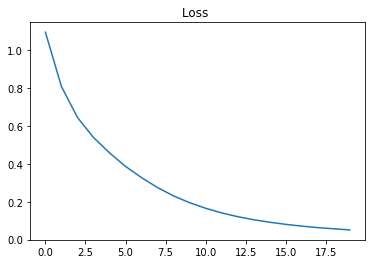

In [159]:
history.history.keys()

plt.plot(history.history['loss'])
plt.title('Loss ')
plt.show()

In [160]:
accuracy_test = network.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9798
